# Analiza umjetne neuronske mreže pri klasifikaciji rukom pisanih brojeva

## Uvod

Umjetne neuronske mreže (engl. Artificial Neural Networks - ANN) predstavljaju jedan od najčešće korištenih modela strojnog učenja za rješavanje (složenih) problema nadgledanog učenja. Ovakvi modeli su sastavljeni od osnovnih gradbenih jedinica koji se nazivaju neuroni. Za demonstraciju upotrebe višeslojne neuronske mreže koristit će se višeslojna mreža čiji neuroni imaju nelinearnu aktivacijsku funkciju odnosno "MultiLayer Perceptron" ili skraceno MLP.
Neuronske mreže već i s manjim brojem neurona mogu opisati različite nelinearne odnose između ulaznih veličina i izlazne veličine. Međutim, neuronske mreže imaju i znatno više parametara (težina) koje je potrebno procijeniti nego što je slučaj kod jednostavnijih modela poput linearnog regresijskog modela ili logističke regresije.
Pod pojmom učenje neuronske mreže podrazumijeva se strukturiranje neuronske mreže (odabir broja slojeva, odabir broja neurona u pojedinom sloju, odabir tipa aktivacijske funkcije neurona), a zatim i procjena nepoznatih parametara neuronske mreže, tj. težina mreže. Uz definiranu strukturu neuronske mreže, procjena parametra mreže provodi se minimizacijom odgovarajuće kriterijske funkcije. Optimizacija kriterijskih funkcija provodi se iterativnim numeričkim postupcima koji se zasnivaju na gradijentu kriterijske funkcije. Algoritam s povratnim rasprostiranjem pogreške (engl. backpropagation algorithm) je efikasan algoritam za računanje gradijenta kriterijske funkcije.

![alternate text](http://i.imgur.com/oqRiGSy.png)

## Izrada modela

Koristi ćemo nekoliko biblioteka. Koristi ćemo matplotlib.pyplot kako bi nacrtali brojeve i predviđanja. Koristit ćemo dataset brojeva koji dolazi uz sklearn biblioteku. Analizu modela dat ćemo preko izvještaja klasifikacije i matrice zabune. Prije nego što treniramo model moramo skalirati podatke. Za model umjetne neuronske mreže koristit ćemo višeslojni klasifikator.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale
 

C:\Users\marko\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Prije nego što definiramo model koji ćemo naučiti klasifikaciju brojeva moramo učitati podatke te ih skalirati kako bi treniranje bilo što efikasnije. Zatim trebamo podijeliti podatke na trening i testni skup. Uzet ćemo 80% za trening a 20% za testni skup.

In [2]:
digits = load_digits() 
X, y, images = digits.data, digits.target, digits.images 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, test_size=0.20, random_state=67)
testS=scale(X_test)
trainS=scale(X_train)

Kao klasifikator ćemo uzeti višeslojni perceptron koji će imati 10 neurona i jedan skriveni sloj. Prikazat ćemo kako aktivacijska funkcija utječe na učenje modela. Slijedećem modelu smo postavili "identity" aktivacijsku funkciju koja je korisna kod implementacije linearnog gušenja te funkcija izgleda ovako:
$$f(x)=x$$


C:\Users\marko\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Vrjednovanje klasifikatora MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.43      0.91      0.58        33
          1       0.39      0.39      0.39        46
          2       0.21      0.10      0.13        31
          3       0.35      0.54      0.43        37
          4       0.40      0.38      0.39        42
          5       0.12      0.06      0.08        36
          6       0.60      0.79      0.68        33
          7       0.27      0.13      0.17        31
          8       0.25      0.52      0.34        29
 

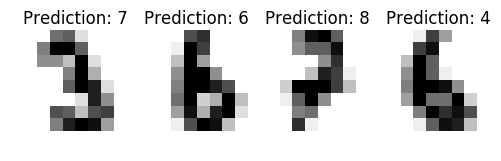

In [3]:
ANN=MLPClassifier(hidden_layer_sizes=(10,1), max_iter=1000, activation='identity')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Iz primjera vidimo da klasifikacija je vrlo loša. Od 4 uzeta broja, model je uspješno prepoznao samo jednog. Slijedeći model je s logističkom sigmoidnom funkcijom koja izgleda ovako:
$$f(x)=\frac{1}{1+e^{-x}}$$

Vrjednovanje klasifikatora MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.23      1.00      0.38        33
          1       0.00      0.00      0.00        46
          2       0.16      1.00      0.28        31
          3       0.00      0.00      0.00        37
          4       0.50      0.05      0.09        42
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        33
          7       0.22      0.16      0.19        31
          8       0.00      0.00      0.00        29
 

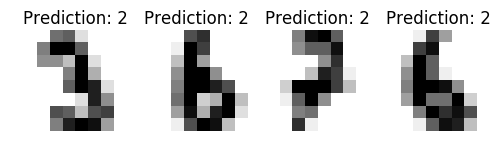

In [4]:
ANN=MLPClassifier(hidden_layer_sizes=(10,1), max_iter=1000, activation='logistic')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Iz ovih prikaza modela možemo zaključiti da je model lošiji nego prijašnji. Štoviše, ovaj model će večinom broj klasificirati ili kao 0 ili kao 6. U slijedećem primjeru čemo vidjeti model s aktivacijskom hiperboličnom tangens funkcijom koja izgleda ovako:
$$f(x)=tanh(x)$$

Vrjednovanje klasifikatora MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.00      0.00      0.00        46
          2       0.00      0.00      0.00        31
          3       0.33      0.08      0.13        37
          4       0.00      0.00      0.00        42
          5       0.00      0.00      0.00        36
          6       0.18      0.97      0.30        33
          7       0.18      1.00      0.30        31
          8       0.00      0.00      0.00        29
     

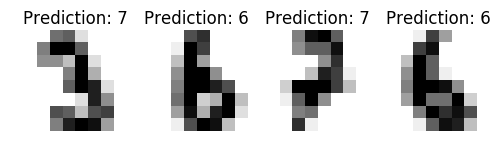

In [5]:
ANN=MLPClassifier(hidden_layer_sizes=(10,1), max_iter=1000, activation='tanh')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Vidimo da ovaj model večinom brojeve klasificira kao 5 i 6. Prema rezultatima klasifikacijskog izvještaja možemo zaključiti da hiberbolična tangens funkcija nije namjenjena za ovakve podatke. Na idućem primjeru promotrit ćemo zadnju aktivacijsku funkciju a to je ispravljena linearna funkcija koja se koristi i ako se ne definira aktivacijska funkcija, a izgleda ovako:
$$f(x)=max(0,x)$$

Vrjednovanje klasifikatora MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.82      0.91      0.87        46
          2       0.97      0.94      0.95        31
          3       0.66      0.57      0.61        37
          4       0.00      0.00      0.00        42
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        33
          7       0.14      0.97      0.25        31
          8       0.58      0.72      0.65        29
     

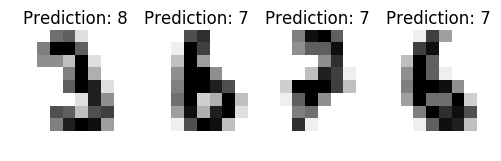

In [6]:
ANN=MLPClassifier(hidden_layer_sizes=(10,1), max_iter=1000, activation='relu')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Vidimo da ova aktivacijska funkcija je donjela puno veću preciznost nego prethodni primjer ali ako analiziramo primjer možemo vidjeti da niti jedan broj nije klasificirao kao 0, 1 i 2 što je netočno. Iz ovih primjera možemo vidjeti da je najbolji score imala identity aktivacijska funkcija. U idućem podpoglavlju promotrit ćemo ponašanje identity aktivacijske funkcije ukoliko se mijenja broj neurona.

## Analiza MLP-a pri promjeni broja neurona uz stalan broj skrivenih slojeva

U prethodnom podpoglavlju smo promotrili MLP pri promjeni aktivacijske funkcije i zaključili da 'identity' aktivacijska funkcija je najbolje opisala predviđene podatke. Sada ćemo promotriti sustav ukoliko mijenjamo broj neurona u sloju pri čemu ćemo imati samo jedan skriveni sloj. Za prvi primjer ćemo staviti samo 3 neurona.

Vrjednovanje klasifikatora MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.46      0.48      0.47        33
          1       0.21      0.07      0.10        46
          2       0.64      0.90      0.75        31
          3       0.39      0.54      0.45        37
          4       0.84      0.74      0.78        42
          5       0.35      0.58      0.44        36
          6       0.43      0.58      0.49        33
          7       0.36      0.48      0.41        31
          8       0.21      0.24      0.23        29
  

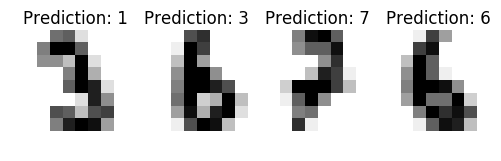

In [7]:
ANN=MLPClassifier(hidden_layer_sizes=(4,1), max_iter=1000, activation='identity')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Vidimo da sa smanjenjem broja neurona pada i kakoca klasifikacije što je razumno za zaključiti no vrlo zanimljiv slučaj je slučaj kada postavimo samo 2 neurona.

Vrjednovanje klasifikatora MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.50      0.94      0.65        33
          1       0.00      0.00      0.00        46
          2       0.25      0.26      0.25        31
          3       0.40      0.51      0.45        37
          4       0.50      0.83      0.62        42
          5       0.21      0.17      0.18        36
          6       0.26      0.24      0.25        33
          7       0.24      0.29      0.26        31
          8       0.35      0.48      0.41        29
  

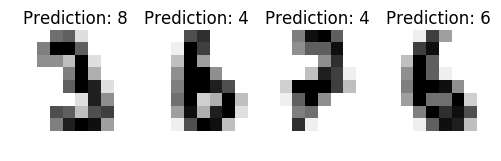

In [8]:
ANN=MLPClassifier(hidden_layer_sizes=(4,1), max_iter=1000, activation='identity')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Ovaj slučaj je zanimljiv jer s manjim brojem neurona smo postigli bolji model. Razlog tome je što u ovom slučaju klasifikator pokušava postaviti pravac umjesto krivulje nekog reda koja loše opisuje podatke. U iućem primjeru ćemo koristiti 20 neurona.

Vrjednovanje klasifikatora MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.48      0.76      0.59        33
          1       0.50      0.02      0.04        46
          2       0.53      0.74      0.62        31
          3       0.28      0.41      0.33        37
          4       0.85      0.83      0.84        42
          5       0.16      0.14      0.15        36
          6       0.62      0.70      0.66        33
          7       0.35      0.26      0.30        31
          8       0.25      0.55      0.35        29
 

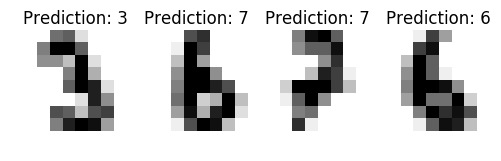

In [9]:
ANN=MLPClassifier(hidden_layer_sizes=(20,1), max_iter=1000, activation='identity')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

Ovaj primjer je također zanimljiv jer vidimo da povećanje broja neurona ne vodi k poboljšanju svojstava modela. Slika koja je prikazana na samom početku ovog dokumenta nam može poslužiti za objasnjenje ovog primjera. Svaki neuron prima ulaze svake ulazne veličine što znači da u ovom primjeru ukoliko stavimo više od 10 neurona tada ćemo imati duplicirane neurone koji zapravo neće pripomoći poboljšanju modela. Iz svih ovih primjera zaključili smo da s 'identity' aktivacijskom funkcijom smo dobili najbolje rezultate te da najbolji broj neurona po sloju je 10. Na idućem primjeru prikazat ćemo model s 'identity' aktivacijskom funkcijom, 10 neurona po sloju te 50 skrivenih slojeva.

Vrjednovanje klasifikatora MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        33
          1       0.98      0.91      0.94        46
          2       0.91      0.97      0.94        31
          3       0.95      0.95      0.95        37
          4       0.98      0.95      0.96        42
          5       0.92      0.92      0.92        36
          6       0.94      1.00      0.97        33
          7       1.00      1.00      1.00        31
          8       0.93      0.86      0.89        29


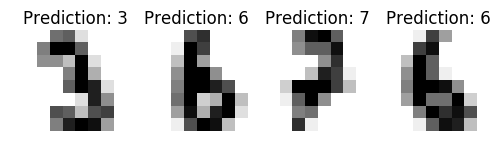

In [10]:
ANN=MLPClassifier(hidden_layer_sizes=(10,50), max_iter=1000, activation='identity')
ANN.fit(trainS,y_train)
ANN_ypredict=ANN.predict(testS)
print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (ANN, classification_report(y_test, ANN_ypredict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, ANN_ypredict)) 

fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, ANN_ypredict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 
plt.show()

## Klasifikacija brojeva korištenjem logističke regresije

MLP klasifikaciju brojeva ćemo usporediti s logističkom regresijom kojom ćemo predati skalirane podatke. 

Vrjednovanje klasifikatora LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.98      0.98      0.98        46
          2       0.97      1.00      0.98        31
          3       0.97      0.95      0.96        37
          4       1.00      0.98      0.99        42
          5       0.94      0.94      0.94        36
          6       0.97      1.00      0.99        33
          7       0.94      1.00      0.97        31
          8       0.89      0.86      0.88        29
          9       0.93      0.90      0.92        42

avg / total       0.96      0.96      0.96       360


Matrica zabune:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  

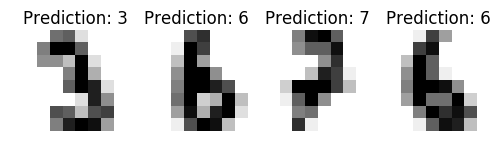

In [11]:
from sklearn.linear_model import LogisticRegression

LogRegModel = LogisticRegression()
LogRegModel.fit(trainS, y_train) 
y_test_predict = LogRegModel.predict(testS) 

print("Vrjednovanje klasifikatora %s:\n%s\n"
      % (LogRegModel, classification_report(y_test, y_test_predict)))
print("Matrica zabune:\n%s" % confusion_matrix(y_test, y_test_predict)) 
fig = plt.figure()
n_samples = len(digits.images)
images_and_predictions = list(zip(images_test, y_test_predict))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
     plt.subplot(2, 4, index + 5)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Prediction: %i' % prediction) 
 

Vidimo da smo s MLP-om uspjeli postići otprilike iste rezultate mada ako malo bolje analiziramo podatke tada ćemo vidjeti da MLP nema niti jednu preciznost manju od 0.9 dok logistička regresija ima. Također oba klasifikatora imaju potpunu točnost u prepoznavanju klase 0.